# Name: Mahek Saluja
# USC ID - 8231303227
# HW6

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_fscore_support, auc, confusion_matrix
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from collections import Counter
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Q1


## 1.a) Load Data

In [78]:
def load_data():
    data = pd.read_csv("../Data/wdbc.csv", header = None)
    data = data.loc[:, 1:]
    data_x = data.loc[:, 2:]
    data_y = data.loc[:, 1]
    return data_x, data_y

def split_data(data, test_ratio = 0.2, random = 1000):
    data_M = data[data[0]==1]
    data_B = data[data[0]==0]
    train_m_x, test_m_x, train_m_y, test_m_y = train_test_split(data_M.loc[:, 1:], data_M.loc[:, 0], test_size = test_ratio, random_state = random)
    train_b_x, test_b_x, train_b_y, test_b_y = train_test_split(data_B.loc[:, 1:], data_B.loc[:, 0], test_size = test_ratio, random_state = random)
    train_x = pd.concat([train_m_x, train_b_x])
    test_x = pd.concat([test_m_x, test_b_x])
    train_y = pd.concat([train_m_y, train_b_y])
    test_y = pd.concat([test_m_y, test_b_y])
    return train_x, train_y, test_x, test_y


In [79]:
overall_summary = []

## 1.b.i) Supervised Learning

In [80]:
data_x, data_y = load_data()
label = LabelEncoder().fit(['B', 'M'])
data_y_enc = pd.DataFrame(label.transform(data_y))
norm = Normalizer().fit(data_x)
data_x_norm = pd.DataFrame(norm.transform(data_x))
data_norm = pd.concat([data_y_enc, data_x_norm], axis = 1, ignore_index = True) 


test_acc = []
train_acc = []
test_prec = []
train_prec = []
test_fscr = []
train_fscr = []
test_auc = []
train_auc = []
test_rec = []
train_rec = []



for i in range(1, 31):
    train_x, train_y, test_x, test_y = split_data(data_norm, random = i)
    linear_svc = LinearSVC(penalty = 'l1', dual=False, max_iter = 4000)
    cv_grid = GridSearchCV(linear_svc, n_jobs = -1, cv = 5, param_grid = {'C' : np.logspace(0, 5, 10)})
    cv_grid.fit(train_x, train_y)
    best_est = cv_grid.best_estimator_
    
    y_train_pred = best_est.predict(train_x)
    y_test_pred = best_est.predict(test_x)
    
    tr_prec, tr_rec, tr_fscr, sup = precision_recall_fscore_support(train_y, y_train_pred, average='macro')
    tst_prec, tst_rec, tst_fscr, sup = precision_recall_fscore_support(test_y, y_test_pred, average='macro')
    
    tr_fpr, tr_tpr, thr = roc_curve(train_y, y_train_pred)
    tst_fpr, tst_tpr, thr = roc_curve(test_y, y_test_pred)
    
    train_auc.append(auc(tr_fpr, tr_tpr))
    test_auc.append(auc(tst_fpr, tst_tpr))
    
    train_rec.append(tr_rec)
    test_rec.append(tst_rec)
    
    train_fscr.append(tr_fscr)
    test_fscr.append(tst_fscr)
    
    train_prec.append(tr_prec)
    test_prec.append(tst_prec)
    
    train_acc.append(accuracy_score(train_y, y_train_pred))
    test_acc.append(accuracy_score(test_y, y_test_pred))

### Supervised Training Result

===== Avg Train Accuracy =====
0.9840675477239356
===== Avg Train Precision =====
0.9838448001261305
===== Avg Train Recall =====
0.9820516280840167
===== Avg Train F-Score =====
0.9829268889892627
===== Avg Train AUC =====
0.9820516280840167
===== Train Confusion Matrix =====
[[284   1]
 [  4 165]]


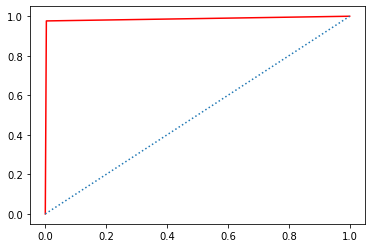

In [81]:
print("===== Avg Train Accuracy =====")
print(np.average(train_acc))
print("===== Avg Train Precision =====")
print(np.average(train_prec))
print("===== Avg Train Recall =====")
print(np.average(train_rec))
print("===== Avg Train F-Score =====")
print(np.average(train_fscr))
print("===== Avg Train AUC =====")
print(np.average(train_auc))
print("===== Train Confusion Matrix =====")
print(confusion_matrix(train_y, y_train_pred))
plt.plot(tr_fpr, tr_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

### Supervised Test Result

===== Avg Test Accuracy =====
0.9571014492753622
===== Avg Test Precision =====
0.9546875203732659
===== Avg Test Recall =====
0.9546565460809648
===== Avg Test F-Score =====
0.9541792495026228
===== Avg Test AUC =====
0.9546565460809647
===== Test Confusion Matrix =====
[[71  1]
 [ 4 39]]


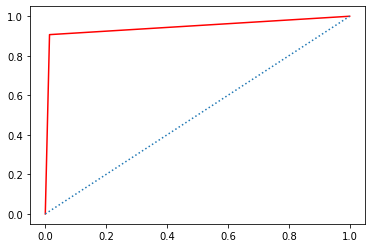

In [82]:
print("===== Avg Test Accuracy =====")
print(np.average(test_acc))
print("===== Avg Test Precision =====")
print(np.average(test_prec))
print("===== Avg Test Recall =====")
print(np.average(test_rec))
print("===== Avg Test F-Score =====")
print(np.average(test_fscr))
print("===== Avg Test AUC =====")
print(np.average(test_auc))
print("===== Test Confusion Matrix =====")
print(confusion_matrix(test_y, y_test_pred))
plt.plot(tst_fpr, tst_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

In [83]:
overall_summary.append([np.average(test_acc), np.average(test_prec), np.average(test_rec), np.average(test_fscr), np.average(test_auc)])

## 1.b.ii) Semi-Supervised Learning

In [84]:
def one_by_one_labeling(estimator, unlabeled_x, labeled_x, labeled_y):
    runs = unlabeled_x.shape[0]
    #print(unlabeled_x.shape)
    for j in range(runs):
        dist = np.absolute(estimator.decision_function(unlabeled_x))
        max_dist = np.argmax(dist)
        #print(dist.shape)
        #print(dist[max_dist])
        farthest_data = np.array(unlabeled_x[max_dist]).reshape(1, 30)
        new_label = estimator.predict(farthest_data)
        unlabeled_x = np.delete(unlabeled_x, max_dist, axis = 0)
        labeled_x = np.append(labeled_x, farthest_data, axis = 0)
        labeled_y = np.append(labeled_y, new_label, axis = 0)
        estimator.fit(labeled_x, labeled_y)
    return estimator

In [85]:
data_x, data_y = load_data()
label = LabelEncoder().fit(['B', 'M'])
data_y_enc = pd.DataFrame(label.transform(data_y))
norm = Normalizer().fit(data_x)
data_x_norm = pd.DataFrame(norm.transform(data_x))
data_norm = pd.concat([data_y_enc, data_x_norm], axis = 1, ignore_index = True) 


test_acc = []
train_acc = []
test_prec = []
train_prec = []
test_fscr = []
train_fscr = []
test_auc = []
train_auc = []
test_rec = []
train_rec = []



for i in range(1, 31):
    train_x, train_y, test_x, test_y = split_data(data_norm, random = i)
    
    train = pd.concat([train_y, train_x], axis = 1, ignore_index = True) 
    
    labeled_x, labeled_y, unlabeled_x, unlabeled_y = split_data(train, test_ratio = 0.5, random = i)
    #print(train.shape)
    
    linear_svc = LinearSVC(penalty = 'l1', dual=False, max_iter = 4000)
    cv_grid = GridSearchCV(linear_svc, n_jobs = -1, cv = 5, param_grid = {'C' : np.logspace(0, 5, 10)})
    cv_grid.fit(labeled_x, labeled_y)
    best_est = cv_grid.best_estimator_
    
    best_est = one_by_one_labeling(best_est, deepcopy(unlabeled_x.to_numpy()), deepcopy(labeled_x.to_numpy()), deepcopy(labeled_y.to_numpy()))
    
    
    #y_train_pred = best_est.predict(train_x)
    y_test_pred = best_est.predict(test_x)
    
    #tr_prec, tr_rec, tr_fscr, sup = precision_recall_fscore_support(train_y, y_train_pred, average='binary')
    tst_prec, tst_rec, tst_fscr, sup = precision_recall_fscore_support(test_y, y_test_pred, average='macro')
    
    #tr_fpr, tr_tpr, thr = roc_curve(train_y, y_train_pred)
    tst_fpr, tst_tpr, thr = roc_curve(test_y, y_test_pred)
    
    #train_auc.append(auc(tr_fpr, tr_tpr))
    test_auc.append(auc(tst_fpr, tst_tpr))
    
    #train_rec.append(tr_rec)
    test_rec.append(tst_rec)
    
    #train_fscr.append(tr_fscr)
    test_fscr.append(tst_fscr)
    
    #train_prec.append(tr_prec)
    test_prec.append(tst_prec)
    
    #train_acc.append(accuracy_score(train_y, y_train_pred))
    test_acc.append(accuracy_score(test_y, y_test_pred))

### Semi-Supervised Test Result

===== Avg Test Accuracy =====
0.9579710144927537
===== Avg Test Precision =====
0.955759065999928
===== Avg Test Recall =====
0.9556632213608957
===== Avg Test F-Score =====
0.9551593289275417
===== Avg Test AUC =====
0.9556632213608957
===== Test Confusion Matrix =====
[[70  2]
 [ 1 42]]


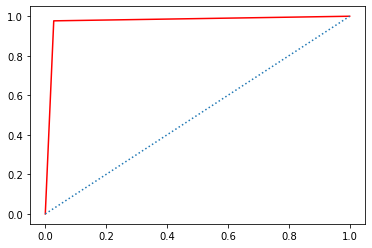

In [86]:
print("===== Avg Test Accuracy =====")
print(np.average(test_acc))
print("===== Avg Test Precision =====")
print(np.average(test_prec))
print("===== Avg Test Recall =====")
print(np.average(test_rec))
print("===== Avg Test F-Score =====")
print(np.average(test_fscr))
print("===== Avg Test AUC =====")
print(np.average(test_auc))
print("===== Test Confusion Matrix =====")
print(confusion_matrix(test_y, y_test_pred))
plt.plot(tst_fpr, tst_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

In [87]:
overall_summary.append([np.average(test_acc), np.average(test_prec), np.average(test_rec), np.average(test_fscr), np.average(test_auc)])

## 1.b.iii) UnSupervised Learning

#### To avoid trapped for local minimum, we need to randomize data and also initialize randomize algorithm and run multiple time

In [88]:
data_x, data_y = load_data()
label = LabelEncoder().fit(['B', 'M'])
data_y_enc = pd.DataFrame(label.transform(data_y))
norm = Normalizer().fit(data_x)
data_x_norm = pd.DataFrame(norm.transform(data_x))
data_norm = pd.concat([data_y_enc, data_x_norm], axis = 1, ignore_index = True) 


test_acc = []
train_acc = []
test_prec = []
train_prec = []
test_fscr = []
train_fscr = []
test_auc = []
train_auc = []
test_rec = []
train_rec = []



for i in range(1, 31):
    train_x, train_y, test_x, test_y = split_data(data_norm, random = i)
    
    kmean = KMeans(n_clusters = 2, init = 'random').fit(train_x)
    
    cluster1_nearest = np.argsort(cdist(train_x, kmean.cluster_centers_, 'euclidean')[:, 0], axis = 0)[:30]
    cluster2_nearest = np.argsort(cdist(train_x, kmean.cluster_centers_, 'euclidean')[:, 1], axis = 0)[:30]
    
    tr_y_np = train_y.to_numpy()
    cluster1_label = Counter(tr_y_np[cluster1_nearest]).most_common(1)[0][0]
    cluster2_label = Counter(tr_y_np[cluster2_nearest]).most_common(1)[0][0]
    #print(cluster1_label)
    #print(cluster2_label)
    cluster_labels_train = kmean.predict(train_x)
    zeros = np.where(cluster_labels_train == 0)
    ones = np.where(cluster_labels_train == 1)
    #print(cluster_labels)
    cluster_labels_train[zeros] = cluster1_label
    cluster_labels_train[ones] = cluster2_label
    
    
    cluster_labels_test = kmean.predict(test_x)
    zeros = np.where(cluster_labels_test == 0)
    ones = np.where(cluster_labels_test == 1)
    #print(cluster_labels)
    cluster_labels_test[zeros] = cluster1_label
    cluster_labels_test[ones] = cluster2_label
    
    #print(cluster_labels)

    
    tr_prec, tr_rec, tr_fscr, sup = precision_recall_fscore_support(train_y, cluster_labels_train, average='macro')
    tst_prec, tst_rec, tst_fscr, sup = precision_recall_fscore_support(test_y, cluster_labels_test, average='macro')
    
    tr_fpr, tr_tpr, thr = roc_curve(train_y, cluster_labels_train)
    tst_fpr, tst_tpr, thr = roc_curve(test_y, cluster_labels_test)
    
    train_auc.append(auc(tr_fpr, tr_tpr))
    test_auc.append(auc(tst_fpr, tst_tpr))
    
    train_rec.append(tr_rec)
    test_rec.append(tst_rec)
    
    train_fscr.append(tr_fscr)
    test_fscr.append(tst_fscr)
    
    train_prec.append(tr_prec)
    test_prec.append(tst_prec)
    
    train_acc.append(accuracy_score(train_y, cluster_labels_train))
    test_acc.append(accuracy_score(test_y, cluster_labels_test))

### UnSupervised Train Result

===== Avg Train Accuracy =====
0.8865638766519827
===== Avg Train Precision =====
0.907991446234634
===== Avg Train Recall =====
0.854336482231219
===== Avg Train F-Score =====
0.8712216260224187
===== Avg Train AUC =====
0.854336482231219
===== Train Confusion Matrix =====
[[279   6]
 [ 42 127]]


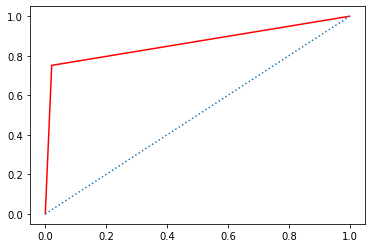

In [89]:
print("===== Avg Train Accuracy =====")
print(np.average(train_acc))
print("===== Avg Train Precision =====")
print(np.average(train_prec))
print("===== Avg Train Recall =====")
print(np.average(train_rec))
print("===== Avg Train F-Score =====")
print(np.average(train_fscr))
print("===== Avg Train AUC =====")
print(np.average(train_auc))
print("===== Train Confusion Matrix =====")
print(confusion_matrix(train_y, cluster_labels_train))
plt.plot(tr_fpr, tr_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

### Unsupervised Test Result

===== Avg Test Accuracy =====
0.890144927536232
===== Avg Test Precision =====
0.9130565379017316
===== Avg Test Recall =====
0.8585648148148146
===== Avg Test F-Score =====
0.8749124251539678
===== Avg Test AUC =====
0.8585648148148146
===== Test Confusion Matrix =====
[[71  1]
 [14 29]]


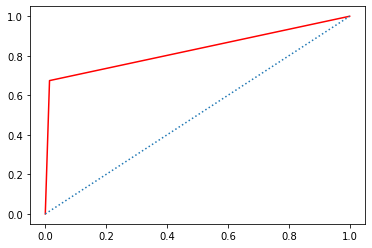

In [90]:
print("===== Avg Test Accuracy =====")
print(np.average(test_acc))
print("===== Avg Test Precision =====")
print(np.average(test_prec))
print("===== Avg Test Recall =====")
print(np.average(test_rec))
print("===== Avg Test F-Score =====")
print(np.average(test_fscr))
print("===== Avg Test AUC =====")
print(np.average(test_auc))
print("===== Test Confusion Matrix =====")
print(confusion_matrix(test_y, cluster_labels_test))
plt.plot(tst_fpr, tst_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

In [91]:
overall_summary.append([np.average(test_acc), np.average(test_prec), np.average(test_rec), np.average(test_fscr), np.average(test_auc)])

## 1.b.iv) Spectral Clustering

In [92]:
data_x, data_y = load_data()
label = LabelEncoder().fit(['B', 'M'])
data_y_enc = pd.DataFrame(label.transform(data_y))
norm = Normalizer().fit(data_x)
data_x_norm = pd.DataFrame(norm.transform(data_x))
data_norm = pd.concat([data_y_enc, data_x_norm], axis = 1, ignore_index = True) 


test_acc = []
train_acc = []
test_prec = []
train_prec = []
test_fscr = []
train_fscr = []
test_auc = []
train_auc = []
test_rec = []
train_rec = []



for i in range(1, 31):
    train_x, train_y, test_x, test_y = split_data(data_norm, random = i)
    
    
    
    
    spectral = SpectralClustering(n_clusters = 2, random_state = i)
    spectral_labels = spectral.fit_predict(train_x)
    zeroes = np.where(spectral_labels==0)
    ones = np.where(spectral_labels==1)
    tr_y_np = train_y.to_numpy()
    cluster1_label = Counter(tr_y_np[zeroes]).most_common(1)[0][0]
    cluster2_label = Counter(tr_y_np[ones]).most_common(1)[0][0]
    
    spectral_labels[zeroes] = cluster1_label
    spectral_labels[ones] = cluster2_label
    
    spectral_test_label = spectral.fit_predict(test_x)
    
    zeroes = np.where(spectral_test_label==0)
    ones = np.where(spectral_test_label==1)
    tst_y_np = test_y.to_numpy()
    cluster1_label_test = Counter(tst_y_np[zeroes]).most_common(1)[0][0]
    cluster2_label_test = Counter(tst_y_np[ones]).most_common(1)[0][0]
    
    spectral_test_label[zeroes] = cluster1_label_test
    spectral_test_label[ones] = cluster2_label_test
    
    tr_prec, tr_rec, tr_fscr, sup = precision_recall_fscore_support(train_y, spectral_labels, average='macro')
    tst_prec, tst_rec, tst_fscr, sup = precision_recall_fscore_support(test_y, spectral_test_label, average='macro')
    
    tr_fpr, tr_tpr, thr = roc_curve(train_y, spectral_labels)
    tst_fpr, tst_tpr, thr = roc_curve(test_y, spectral_test_label)
    
    train_auc.append(auc(tr_fpr, tr_tpr))
    test_auc.append(auc(tst_fpr, tst_tpr))
    
    train_rec.append(tr_rec)
    test_rec.append(tst_rec)
    
    train_fscr.append(tr_fscr)
    test_fscr.append(tst_fscr)
    
    train_prec.append(tr_prec)
    test_prec.append(tst_prec)
    
    train_acc.append(accuracy_score(train_y, spectral_labels))
    test_acc.append(accuracy_score(test_y, spectral_test_label))

### Spectral Train Result

===== Avg Train Accuracy =====
0.8819383259911897
===== Avg Train Precision =====
0.9055603343056415
===== Avg Train Recall =====
0.8477622063047163
===== Avg Train F-Score =====
0.8653705829560553
===== Avg Train AUC =====
0.8477622063047163
===== Train Confusion Matrix =====
[[279   6]
 [ 42 127]]


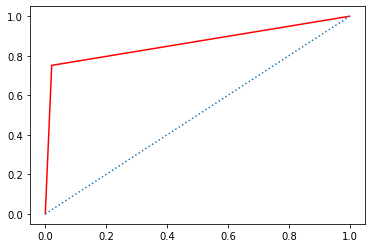

In [93]:
print("===== Avg Train Accuracy =====")
print(np.average(train_acc))
print("===== Avg Train Precision =====")
print(np.average(train_prec))
print("===== Avg Train Recall =====")
print(np.average(train_rec))
print("===== Avg Train F-Score =====")
print(np.average(train_fscr))
print("===== Avg Train AUC =====")
print(np.average(train_auc))
print("===== Train Confusion Matrix =====")
print(confusion_matrix(train_y, spectral_labels))
plt.plot(tr_fpr, tr_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

### Spectral Test Result

===== Avg Test Accuracy =====
0.8869565217391303
===== Avg Test Precision =====
0.9105473343212538
===== Avg Test Recall =====
0.8555501722652886
===== Avg Test F-Score =====
0.8711682517204988
===== Avg Test AUC =====
0.8555501722652887
===== Test Confusion Matrix =====
[[72  0]
 [20 23]]


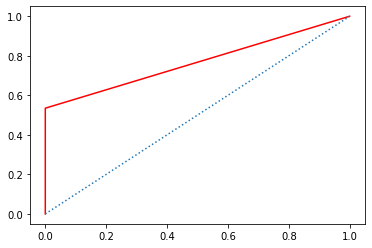

In [94]:
print("===== Avg Test Accuracy =====")
print(np.average(test_acc))
print("===== Avg Test Precision =====")
print(np.average(test_prec))
print("===== Avg Test Recall =====")
print(np.average(test_rec))
print("===== Avg Test F-Score =====")
print(np.average(test_fscr))
print("===== Avg Test AUC =====")
print(np.average(test_auc))
print("===== Test Confusion Matrix =====")
print(confusion_matrix(test_y, spectral_test_label))
plt.plot(tst_fpr, tst_tpr, color='red')
plt.plot([0, 1], [0, 1], linestyle='dotted')

In [95]:
overall_summary.append([np.average(test_acc), np.average(test_prec), np.average(test_rec), np.average(test_fscr), np.average(test_auc)])

## 1.v) Comparison Models

In [96]:
summary = pd.DataFrame(overall_summary)
summary.columns = ['Accuracy', 'Precision', 'Recall', 'F-Score', 'AUC']
summary.index=['Supervised', 'Semi-Supervised', 'Un-Supervised', 'Spectral']
summary.T

,Supervised,Semi-Supervised,Un-Supervised,Spectral
Accuracy,0.957101,0.957971,0.890145,0.886957
Precision,0.954688,0.955759,0.913057,0.910547
Recall,0.954657,0.955663,0.858565,0.855550
F-Score,0.954179,0.955159,0.874912,0.871168
AUC,0.954657,0.955663,0.858565,0.855550


##### Conclusion: Un-Supervised learning underperforms in this situation. Both Supervised and Semi-Supervised learning performs well. Spectral also under-performs in this.

# Q2 

## 2.a) Load Data

In [97]:
def load_split():
    data = pd.read_csv('../Data/data_banknote_authentication.txt', header=None) 
    index = np.random.permutation(len(data))
    test = data.loc[index[:472]]
    train = data.loc[index[472:]]
    return train.loc[:, :3], train.loc[:, 4], test.loc[:, :3], test.loc[:, 4]

## 2.b) Passive Learning

In [98]:
test_error_passive = []
pipeline = Pipeline([('lin_svc', LinearSVC(penalty = 'l1', dual=False, max_iter = 4000))])
for i in range(50):
    
    
    tr_x_np = pd.DataFrame()
    tr_y_np = pd.DataFrame()
    tst_err = []
    
    
    train_x, train_y, test_x, test_y = load_split()
    scaler = StandardScaler().fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    index = np.random.permutation(900)
    train_x = pd.DataFrame(train_x)
    train_y = pd.DataFrame(train_y.to_numpy())
    for j in range(0, 891, 10):
        batch = index[j:j+10]
        tr_x_np = pd.concat([tr_x_np, train_x.loc[batch]], axis = 0)
        tr_y_np = pd.concat([tr_y_np, train_y.loc[batch]], axis = 0)
        cv_grid = GridSearchCV(pipeline, cv = 5, param_grid = {'lin_svc__C':np.logspace(0, 5, 5)}, n_jobs = -1, scoring='accuracy')
        cv_grid.fit(tr_x_np, tr_y_np)
        tst_err.append(1-cv_grid.score(test_x, test_y))
    
    test_error_passive.append(tst_err)   
        

### Passive Learning Test Error Results

In [99]:
pd.DataFrame(test_error_passive)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.055085,0.044492,0.025424,0.027542,0.029661,0.025424,0.023305,0.023305,0.023305,0.023305,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
1,0.264831,0.027542,0.016949,0.040254,0.016949,0.027542,0.014831,0.014831,0.012712,0.006356,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.008475,0.008475,0.014831
2,0.021186,0.027542,0.027542,0.023305,0.016949,0.021186,0.021186,0.016949,0.016949,0.006356,...,0.006356,0.006356,0.006356,0.004237,0.004237,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.023305,0.046610,0.025424,0.023305,0.019068,0.019068,0.016949,0.016949,0.016949,0.016949,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
4,0.131356,0.023305,0.014831,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.006356,0.006356,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356
5,0.167373,0.044492,0.029661,0.023305,0.021186,0.025424,0.025424,0.021186,0.023305,0.025424,...,0.006356,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,0.023305,0.038136,0.038136,0.040254,0.025424,0.023305,0.023305,0.023305,0.023305,0.023305,...,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.158898,0.103814,0.135593,0.042373,0.014831,0.014831,0.014831,0.014831,0.012712,0.014831,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
8,0.074153,0.033898,0.036017,0.029661,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.002119,0.004237,0.002119,0.002119
9,0.021186,0.076271,0.025424,0.010593,0.012712,0.008475,0.010593,0.010593,0.012712,0.010593,...,0.008475,0.008475,0.008475,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237


Text(0, 0.5, 'Test Error')

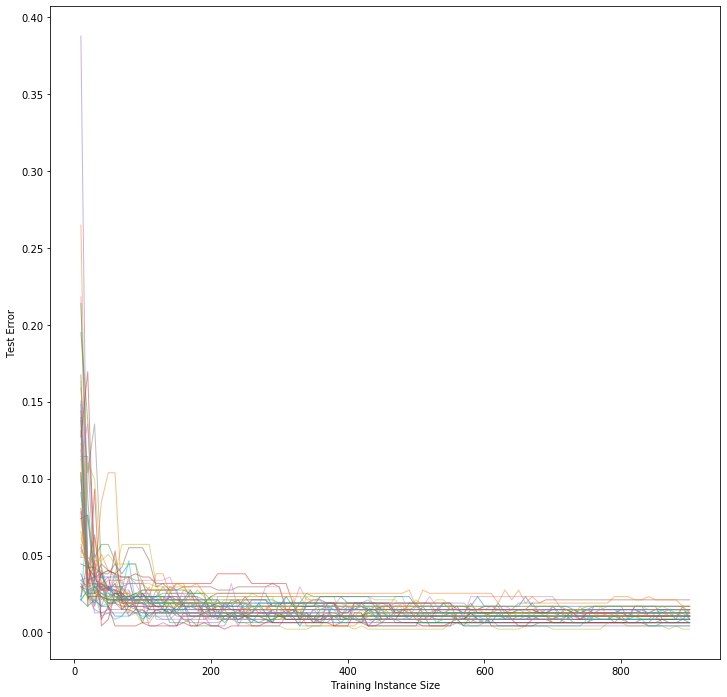

In [100]:
training_inst = [i for i in range(10, 901, 10)]
plt.figure(figsize=(12, 12))
for i in range(50):
    plt.plot(training_inst, test_error_passive[i], linewidth = 1, alpha = 0.5)
plt.xlabel('Training Instance Size')
plt.ylabel('Test Error')

## 2.b.iii) Active Learning

In [101]:
indexes = np.random.permutation(900)

test_error_active = []
pipeline = Pipeline([('lin_svc', LinearSVC(penalty = 'l1', dual=False, max_iter = 4000))])
for i in range(50):
    
    tst_err = []

    train_x, train_y, test_x, test_y = load_split()
    scaler = StandardScaler().fit(train_x)
    x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    index = np.random.permutation(900)
    y = train_y.to_numpy()
    batch = index[:10]
    tr_x_np = x[batch]
    tr_y_np = y[batch]
    x = np.delete(x, batch, axis=0)
    y = np.delete(y, batch, axis=0)
    for j in range(0, 891, 10):
        cv_grid = GridSearchCV(pipeline, cv = 5, param_grid = {'lin_svc__C':np.logspace(0, 5, 5)}, n_jobs = -1, scoring='accuracy')
        cv_grid.fit(tr_x_np, tr_y_np)
        tst_err.append(1-cv_grid.score(test_x, test_y))
        if len(x) == 0:
            break
        best_est = cv_grid.best_estimator_
        dist = np.absolute(best_est.decision_function(x))
        top_ten = list(np.argsort(dist)[:10])
        #print(top_ten)
        
        tr_x_np = np.append(tr_x_np, x[top_ten], axis = 0)
        tr_y_np = np.append(tr_y_np, y[top_ten], axis = 0)
        
        x = np.delete(x, top_ten, axis=0)
        y = np.delete(y, top_ten, axis=0)
    
    test_error_active.append(tst_err)  

### Active Learning Test Errors

In [102]:
pd.DataFrame(test_error_active)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.029661,0.027542,0.004237,0.012712,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,...,0.004237,0.002119,0.004237,0.004237,0.004237,0.004237,0.004237,0.006356,0.002119,0.002119
1,0.095339,0.036017,0.038136,0.023305,0.012712,0.014831,0.014831,0.014831,0.016949,0.016949,...,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949
2,0.148305,0.033898,0.074153,0.027542,0.010593,0.010593,0.012712,0.012712,0.012712,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.012712
3,0.118644,0.023305,0.036017,0.019068,0.021186,0.014831,0.008475,0.012712,0.006356,0.006356,...,0.006356,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
4,0.048729,0.025424,0.021186,0.014831,0.010593,0.014831,0.010593,0.014831,0.014831,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.012712,0.012712,0.012712,0.014831,0.010593
5,0.158898,0.050847,0.029661,0.019068,0.019068,0.006356,0.010593,0.008475,0.008475,0.008475,...,0.008475,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
6,0.125000,0.148305,0.027542,0.027542,0.019068,0.021186,0.010593,0.010593,0.008475,0.008475,...,0.008475,0.008475,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.067797,0.038136,0.016949,0.019068,0.029661,0.021186,0.021186,0.021186,0.021186,0.021186,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186
8,0.207627,0.019068,0.012712,0.019068,0.012712,0.012712,0.008475,0.010593,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
9,0.137712,0.036017,0.027542,0.023305,0.014831,0.016949,0.014831,0.012712,0.012712,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


### Active Learning Test Error Curve

Text(0, 0.5, 'Test Error')

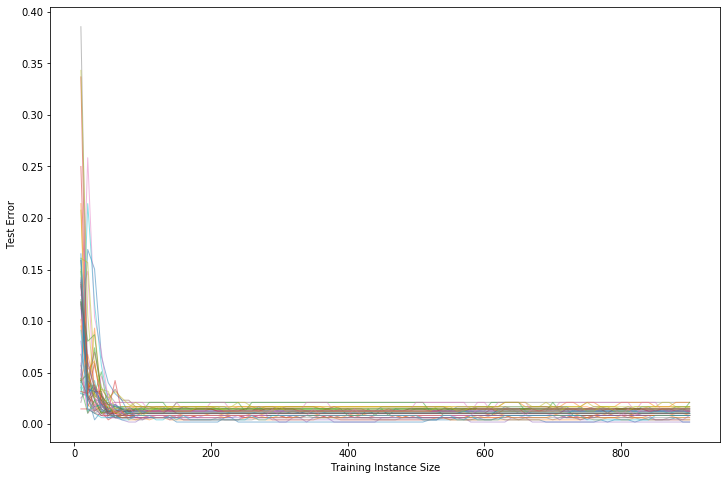

In [103]:
training_inst = [i for i in range(10, 901, 10)]
plt.figure(figsize=(12, 8))
for i in range(50):
    plt.plot(training_inst, test_error_active[i], linewidth = 1, alpha = 0.5)
plt.xlabel('Training Instance Size')
plt.ylabel('Test Error')

## 2.c.iii) Learning Curve for Active and Passive Learning

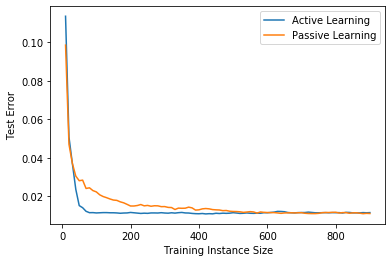

In [104]:
len(np.average(test_error, axis = 0))
plt.plot(training_inst, np.average(test_error_active, axis = 0), label='Active Learning')
plt.plot(training_inst, np.average(test_error_passive, axis = 0), label='Passive Learning')
plt.xlabel('Training Instance Size')
plt.ylabel('Test Error')
plt.legend()

##### Conclusion: Both Active and Pasive learner performs good in this case. Although Active learner are supposed to perform better in comparison to passive, but there is no free lunch